In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('./남자/Male_volleyball.csv')
df

,팀명,경기날짜,결과,이름,공격종합_성공률,오픈_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,디그_시도,디그_성공,세트_시도,세트_성공,블로킹_시도,블로킹_성공,범실_범실,포지션,득점점유율,스타팅멤버
0,현대캐피탈,2017-10-14,1,안드레아스,61.76,60.00,75.00,0.00,53.33,0.00,6,4,2,0,12,2,10,L,0.338235,1
1,현대캐피탈,2017-10-14,1,문성민,53.13,45.45,46.15,0.00,71.43,0.25,8,5,2,1,7,0,7,R,0.264706,1
2,현대캐피탈,2017-10-14,1,신영석,50.00,50.00,0.00,50.00,0.00,0.25,5,5,4,1,11,5,1,C,0.147059,1
3,현대캐피탈,2017-10-14,1,김재휘,50.00,0.00,0.00,50.00,0.00,0.25,3,2,1,1,10,2,5,C,0.102941,1
4,현대캐피탈,2017-10-14,1,이시우,75.00,0.00,0.00,0.00,100.00,0.25,5,3,3,2,1,0,4,L,0.102941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,OK금융그룹,2022-02-13,1,박원빈,0.00,0.00,0.00,0.00,0.00,0.00,4,3,5,1,13,1,1,C,0.019608,1
11015,OK금융그룹,2022-02-13,1,진상헌,33.33,0.00,0.00,33.33,0.00,0.00,0,0,0,0,7,0,0,C,0.019608,1
11016,OK금융그룹,2022-02-13,1,전병선,0.00,0.00,0.00,0.00,0.00,0.33,1,0,0,0,0,0,0,R,0.019608,0
11017,OK금융그룹,2022-02-13,1,부용찬,0.00,0.00,0.00,0.00,0.00,0.00,8,7,0,0,0,0,0,Li,0.000000,0


In [3]:
df['이름'] = df['팀명'] + "_" + df['이름']

## OK저축은행이 OK금융그룹으로 이름을 변경함.

In [4]:
cond = df['팀명'] =='OK저축은행'

In [5]:
df.loc[cond,['팀명']] = 'OK금융그룹'


# 5년동안 팀이름은 변경이 없음

In [6]:
# 경기날짜의 데이터타입 변경 (datetime64)
df['경기날짜'] = df['경기날짜'].astype('datetime64')
df.dtypes

팀명                  object
경기날짜        datetime64[ns]
결과                   int64
이름                  object
공격종합_성공률           float64
오픈_성공률             float64
후위_성공률             float64
속공_성공률             float64
퀵오픈_성공률            float64
서브_성공률             float64
디그_시도                int64
디그_성공                int64
세트_시도                int64
세트_성공                int64
블로킹_시도               int64
블로킹_성공               int64
범실_범실                int64
포지션                 object
득점점유율              float64
스타팅멤버                int64
dtype: object

In [7]:
df['세트_성공률'] = round(df['세트_성공']/df['세트_시도']*100, 2)
df['블로킹_성공률'] = round(df['블로킹_성공']/df['블로킹_시도']*100, 2)
df['디그_성공률'] = round(df['디그_성공']/df['디그_시도']*100, 2)

In [8]:
df['포지션'].unique()

array(['L', 'R', 'C', 'S', 'Li', '오켈로'], dtype=object)

# 레프트(Left side hitter, L), 2명

**공격종합_성공률**

# 라이트(Right side hitter, R), 1명

수비 가담은 적고, 

**공격종합_성공률**


# 센터(Center), 2명

블록킹 능력 중요, 

**블로킹_성공률**

# 세터(Setter), 1명

코트 위의 지휘자, 세터의 토스가 공격에서 중요
리시버, 디거 중요!

**디그_성공률**

# 리베로(Libero), 1명

수비 중요, 

**디그_성공률**

## 선수의 포지션별 등급을 매기기, ( 스타팅멤버가 아닌 사람이 출전할 수도 있으니 스타팅멤버로 하지않음 )

In [9]:
df.fillna(0, inplace=True)

In [10]:
df_player = df.groupby(['이름', '포지션'])[['공격종합_성공률', '블로킹_성공률', '디그_성공률']].mean()
df_player

공격종합_성공률  블로킹_성공률     디그_성공률
이름         포지션                              
KB손해보험_강영준 R      51.514  21.0955  61.984500
KB손해보험_곽동혁 Li      0.000   0.0000  80.850172
KB손해보험_구도현 C      42.500  33.8500  66.666667
KB손해보험_김도훈 L       0.000   0.0000  51.190714
           Li      0.000   0.0000  85.628571
...                  ...      ...        ...
현대캐피탈_홍동선  L      55.030   0.0000  88.890000
현대캐피탈_홍민기  C      13.750  18.7500  25.000000
           R       0.000   0.0000   0.000000
현대캐피탈_황동일  S      25.000  15.4645  49.944500
현대캐피탈_히메네즈 R      54.781  10.3330  59.571000

[355 rows x 3 columns]

In [11]:
df_player.reset_index(level=['이름'], inplace = True)
df_player.reset_index(level=['포지션'], inplace = True)

df_player

,포지션,이름,공격종합_성공률,블로킹_성공률,디그_성공률
0,R,KB손해보험_강영준,51.514,21.0955,61.984500
1,Li,KB손해보험_곽동혁,0.000,0.0000,80.850172
2,C,KB손해보험_구도현,42.500,33.8500,66.666667
3,L,KB손해보험_김도훈,0.000,0.0000,51.190714
4,Li,KB손해보험_김도훈,0.000,0.0000,85.628571
...,...,...,...,...,...
350,L,현대캐피탈_홍동선,55.030,0.0000,88.890000
351,C,현대캐피탈_홍민기,13.750,18.7500,25.000000
352,R,현대캐피탈_홍민기,0.000,0.0000,0.000000
353,S,현대캐피탈_황동일,25.000,15.4645,49.944500


In [12]:
# df_player[df_player['포지션'] == 'L'][['공격종합_성공률']].agg(['mean',])

att = df_player.groupby('포지션')[['공격종합_성공률']].describe()
att

공격종합_성공률                                                                \
       count       mean        std    min        25%        50%        75%   
포지션                                                                          
C       83.0  50.647503  16.034362   0.00  45.300039  52.840676  58.671548   
L      118.0  29.859876  21.618399   0.00   0.378788  38.337269  49.170424   
Li      56.0   0.000000   0.000000   0.00   0.000000   0.000000   0.000000   
R       53.0  38.202549  18.353695   0.00  20.609796  46.725000  51.514000   
S       44.0  20.040845  15.792341   0.00   3.703681  18.933300  31.307870   
오켈로      1.0  46.150000        NaN  46.15  46.150000  46.150000  46.150000   

                 
            max  
포지션              
C    100.000000  
L     57.140000  
Li     0.000000  
R     56.046364  
S     55.555556  
오켈로   46.150000

In [13]:
att = att['공격종합_성공률'][['25%', '50%' ,'75%']]
att.reset_index(level = ['포지션'], inplace=True)
att

,포지션,25%,50%,75%
0,C,45.300039,52.840676,58.671548
1,L,0.378788,38.337269,49.170424
2,Li,0.000000,0.000000,0.000000
3,R,20.609796,46.725000,51.514000
4,S,3.703681,18.933300,31.307870
5,오켈로,46.150000,46.150000,46.150000


In [14]:
block = df_player.groupby('포지션')[['블로킹_성공률']].describe()
block = block['블로킹_성공률'][['25%', '50%' ,'75%']]
block.reset_index(level = ['포지션'], inplace=True)
block

,포지션,25%,50%,75%
0,C,13.634730,17.293770,20.295705
1,L,0.000000,9.836945,16.656982
2,Li,0.000000,0.000000,0.000000
3,R,10.333000,17.804054,22.425143
4,S,4.967672,11.708436,16.144605
5,오켈로,50.000000,50.000000,50.000000


In [15]:
dig = df_player.groupby('포지션')[['디그_성공률']].describe()
dig = dig['디그_성공률'][['25%', '50%' ,'75%']]
dig.reset_index(level = ['포지션'], inplace=True)
dig

,포지션,25%,50%,75%
0,C,53.380000,62.083500,70.152779
1,L,40.416875,62.507284,72.703539
2,Li,71.591569,75.575392,81.769237
3,R,33.333333,64.099259,69.611111
4,S,49.149075,66.591389,70.457388
5,오켈로,66.670000,66.670000,66.670000


L 공격종합_성공률

R 공격종합_성공률

C 블로킹_성공률

S 디그_성공률

Li 디그_성공률

In [16]:
df_player

,포지션,이름,공격종합_성공률,블로킹_성공률,디그_성공률
0,R,KB손해보험_강영준,51.514,21.0955,61.984500
1,Li,KB손해보험_곽동혁,0.000,0.0000,80.850172
2,C,KB손해보험_구도현,42.500,33.8500,66.666667
3,L,KB손해보험_김도훈,0.000,0.0000,51.190714
4,Li,KB손해보험_김도훈,0.000,0.0000,85.628571
...,...,...,...,...,...
350,L,현대캐피탈_홍동선,55.030,0.0000,88.890000
351,C,현대캐피탈_홍민기,13.750,18.7500,25.000000
352,R,현대캐피탈_홍민기,0.000,0.0000,0.000000
353,S,현대캐피탈_황동일,25.000,15.4645,49.944500


In [17]:
# df_player['등급'] = 
for i in range(len(df_player)):
    x = df_player.loc[i, :]
    level = 1
    
    arr = []
    
    if x['포지션'] == 'L':
        per2 = att[att['포지션'] == 'L']['25%'].values[0]
        per5 = att[att['포지션'] == 'L']['50%'].values[0]
        per7 = att[att['포지션'] == 'L']['75%'].values[0]
        a = x['공격종합_성공률']
        arr.append(per2)
        arr.append(per5)
        arr.append(per7)
        arr.append(a)
        arr = sorted(arr)
        level = arr.index(a) + 1
    
    if x['포지션'] == 'R':
        per2 = att[att['포지션'] == 'R']['25%'].values[0]
        per5 = att[att['포지션'] == 'R']['50%'].values[0]
        per7 = att[att['포지션'] == 'R']['75%'].values[0]
        a = x['공격종합_성공률']
        arr.append(per2)
        arr.append(per5)
        arr.append(per7)
        arr.append(a)
        arr = sorted(arr)
        level = arr.index(a) + 1
        
    if x['포지션'] == 'C':
        per2 = block[block['포지션'] == 'C']['25%'].values[0]
        per5 = block[block['포지션'] == 'C']['50%'].values[0]
        per7 = block[block['포지션'] == 'C']['75%'].values[0]
        a = x['블로킹_성공률']
        arr.append(per2)
        arr.append(per5)
        arr.append(per7)
        arr.append(a)
        arr = sorted(arr)
        level = arr.index(a) + 1
        
    if x['포지션'] == 'S':
        per2 = block[block['포지션'] == 'S']['25%'].values[0]
        per5 = block[block['포지션'] == 'S']['50%'].values[0]
        per7 = block[block['포지션'] == 'S']['75%'].values[0]
        a = x['디그_성공률']
        arr.append(per2)
        arr.append(per5)
        arr.append(per7)
        arr.append(a)
        arr = sorted(arr)
        level = arr.index(a) + 1
        
    if x['포지션'] == 'Li':
        per2 = block[block['포지션'] == 'S']['25%'].values[0]
        per5 = block[block['포지션'] == 'S']['50%'].values[0]
        per7 = block[block['포지션'] == 'S']['75%'].values[0]
        a = x['디그_성공률']
        arr.append(per2)
        arr.append(per5)
        arr.append(per7)
        arr.append(a)
        arr = sorted(arr)
        level = arr.index(a) + 1
    df_player.loc[i,'등급'] = level 
        

In [18]:
df_player

,포지션,이름,공격종합_성공률,블로킹_성공률,디그_성공률,등급
0,R,KB손해보험_강영준,51.514,21.0955,61.984500,3.0
1,Li,KB손해보험_곽동혁,0.000,0.0000,80.850172,4.0
2,C,KB손해보험_구도현,42.500,33.8500,66.666667,4.0
3,L,KB손해보험_김도훈,0.000,0.0000,51.190714,1.0
4,Li,KB손해보험_김도훈,0.000,0.0000,85.628571,4.0
...,...,...,...,...,...,...
350,L,현대캐피탈_홍동선,55.030,0.0000,88.890000,4.0
351,C,현대캐피탈_홍민기,13.750,18.7500,25.000000,3.0
352,R,현대캐피탈_홍민기,0.000,0.0000,0.000000,1.0
353,S,현대캐피탈_황동일,25.000,15.4645,49.944500,4.0


In [19]:
level_dict = df_player[['이름','등급']]
level_dict = level_dict.set_index('이름').T.to_dict('list')

C:\Users\user\AppData\Local\Temp/ipykernel_7608/1424401569.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  level_dict = level_dict.set_index('이름').T.to_dict('list')


In [20]:
# 세트성공률, 디그 성공률, 블로킹, 퀵오픈공격 성공률
df_v2 = df.loc[df['스타팅멤버'] == 1, ["팀명","이름","경기날짜", "결과", '스타팅멤버']]
df_v2.fillna(0, inplace=True)
df_v2.isna().sum()

팀명       0
이름       0
경기날짜     0
결과       0
스타팅멤버    0
dtype: int64

In [21]:
df_v2

,팀명,이름,경기날짜,결과,스타팅멤버
0,현대캐피탈,현대캐피탈_안드레아스,2017-10-14,1,1
1,현대캐피탈,현대캐피탈_문성민,2017-10-14,1,1
2,현대캐피탈,현대캐피탈_신영석,2017-10-14,1,1
3,현대캐피탈,현대캐피탈_김재휘,2017-10-14,1,1
5,현대캐피탈,현대캐피탈_박주형,2017-10-14,1,1
...,...,...,...,...,...
11010,OK금융그룹,OK금융그룹_차지환,2022-02-13,1,1
11011,OK금융그룹,OK금융그룹_곽명우,2022-02-13,1,1
11013,OK금융그룹,OK금융그룹_박승수,2022-02-13,1,1
11014,OK금융그룹,OK금융그룹_박원빈,2022-02-13,1,1


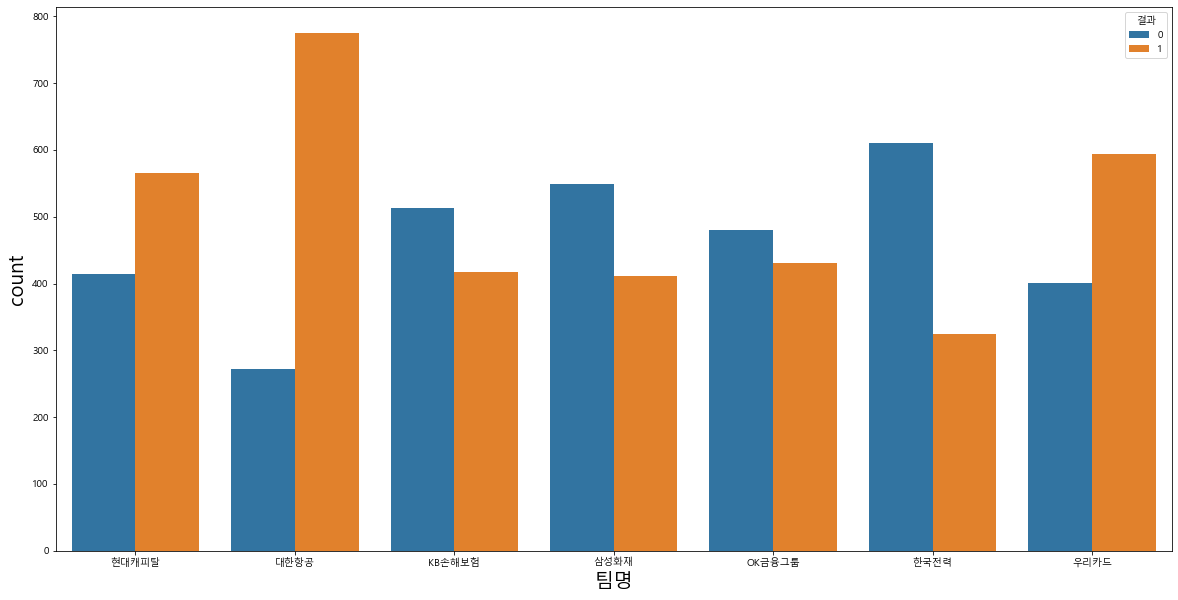

In [22]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.figure(figsize=(20,10))
p = sns.countplot(data = df_v2.loc[:,['팀명', '결과']],x = '팀명', hue='결과'  )
p.set_xlabel('팀명', fontsize=20) 
p.set_ylabel('count',fontsize=20)


plt.show()

In [23]:
df_v2 = df_v2.groupby(['경기날짜', '팀명'])[['이름', '결과']].agg({'이름' : lambda data : ' '.join(data), '결과' : any})
df_v2 = pd.DataFrame(df_v2).reset_index()
df_v2.head()

,경기날짜,팀명,이름,결과
0,2017-10-14,대한항공,대한항공_가스파리니 대한항공_곽승석 대한항공_정지석 대한항공_진상헌 대한항공_조재영...,False
1,2017-10-14,현대캐피탈,현대캐피탈_안드레아스 현대캐피탈_문성민 현대캐피탈_신영석 현대캐피탈_김재휘 현대캐피...,True
2,2017-10-15,KB손해보험,KB손해보험_알렉스 KB손해보험_이강원 KB손해보험_황두연 KB손해보험_이선규 KB...,True
3,2017-10-15,삼성화재,삼성화재_박철우 삼성화재_타이스 삼성화재_김규민 삼성화재_류윤식 삼성화재_박상하 삼...,False
4,2017-10-17,OK금융그룹,OK저축은행_브람 OK저축은행_송명근 OK저축은행_송희채 OK저축은행_이민규 OK저...,True


In [24]:
pd.set_option('mode.chained_assignment',  None) 
for i in range(len(df_v2)):
    df_v2['이름'][i] = ' '.join(df_v2['이름'][i].split()[:6])
    
df_v2.head()

,경기날짜,팀명,이름,결과
0,2017-10-14,대한항공,대한항공_가스파리니 대한항공_곽승석 대한항공_정지석 대한항공_진상헌 대한항공_조재영...,False
1,2017-10-14,현대캐피탈,현대캐피탈_안드레아스 현대캐피탈_문성민 현대캐피탈_신영석 현대캐피탈_김재휘 현대캐피...,True
2,2017-10-15,KB손해보험,KB손해보험_알렉스 KB손해보험_이강원 KB손해보험_황두연 KB손해보험_이선규 KB...,True
3,2017-10-15,삼성화재,삼성화재_박철우 삼성화재_타이스 삼성화재_김규민 삼성화재_류윤식 삼성화재_박상하 삼...,False
4,2017-10-17,OK금융그룹,OK저축은행_브람 OK저축은행_송명근 OK저축은행_송희채 OK저축은행_이민규 OK저...,True


In [25]:
# 경기번호 추가
import numpy as np
total = df_v2.shape[0] // 2
df_v2['경기번호'] = np.array([[i,i] for i in range(1, total+1)]).flatten()
df_v2.head()

,경기날짜,팀명,이름,결과,경기번호
0,2017-10-14,대한항공,대한항공_가스파리니 대한항공_곽승석 대한항공_정지석 대한항공_진상헌 대한항공_조재영...,False,1
1,2017-10-14,현대캐피탈,현대캐피탈_안드레아스 현대캐피탈_문성민 현대캐피탈_신영석 현대캐피탈_김재휘 현대캐피...,True,1
2,2017-10-15,KB손해보험,KB손해보험_알렉스 KB손해보험_이강원 KB손해보험_황두연 KB손해보험_이선규 KB...,True,2
3,2017-10-15,삼성화재,삼성화재_박철우 삼성화재_타이스 삼성화재_김규민 삼성화재_류윤식 삼성화재_박상하 삼...,False,2
4,2017-10-17,OK금융그룹,OK저축은행_브람 OK저축은행_송명근 OK저축은행_송희채 OK저축은행_이민규 OK저...,True,3


In [26]:
col = df['팀명'].unique()
col

array(['현대캐피탈', '대한항공', 'KB손해보험', '삼성화재', 'OK금융그룹', '한국전력', '우리카드'],
      dtype=object)

In [27]:
player = ' '.join(df['이름']).split()
player = list(set(player))

In [28]:
'삼성화재_노재욱' in player

False

In [29]:
#player는 뒤에서 test에서도 써야하니깐 전역 변수로
# player = []

def df_train(club_name, df_v2, check = False, e = []):
    club = df_v2[df_v2['팀명'] == club_name]['경기번호'].to_frame()
    
    club_score = []
    for i in club['경기번호']:
        x = df_v2[(df_v2[ '경기번호'] == i) & (df_v2['팀명'] != club_name )]
        club_score.append({'경기날짜' : x['경기날짜'].values[0],'팀명' : x['팀명'].values[0] , '이름' : x['이름'].values[0], 
                          '결과' : x['결과'].values[0],'경기번호':x['경기번호'].values[0]})

    club_score = pd.DataFrame(club_score)
    
    club_score.loc[:, player] = 0
        
    
    for i in range(len(club_score)):
        for j in club_score['이름'][i].split():
            try:
                
                club_score[j][i] = level_dict[j][0]
            except:
                continue
    
    club_score = pd.get_dummies(club_score, columns=['팀명'])
    
    club_score = club_score.drop(['경기날짜','경기번호','이름'], axis=1)
    
    club_score['결과'] = np.where(club_score['결과'] == True , 0, 1)
    
    if check == True:
        x_col = e.columns
        y_col = club_score.columns
        complement = list(set(x_col).difference(y_col))
        print(len(complement))
        
        club_score.loc[:, complement]  = 0
    
    

    return(club_score)
        


In [30]:
# (['현대캐피탈', '대한항공', 'KB손해보험', '삼성화재', 'OK금융그룹', '한국전력', '우리카드'],
    
df_Capital = df_train('현대캐피탈', df_v2)
df_korea = df_train('대한항공', df_v2)
df_KB = df_train('KB손해보험', df_v2)
df_Sam = df_train('삼성화재', df_v2)
df_OK = df_train('OK금융그룹', df_v2) 
df_KoreaE = df_train('한국전력', df_v2)
df_Woori = df_train('우리카드', df_v2)

In [31]:
df_Capital

,결과,삼성화재_송희채,삼성화재_고준용,우리카드_조근호,OK저축은행_배인호,KB손해보험_양희준,우리카드_김은섭,한국전력_가빈,우리카드_유광우,우리카드_하승우,...,한국전력_서재덕,KB손해보험_하현용,삼성화재_이현우,OK금융그룹_전진선,팀명_KB손해보험,팀명_OK금융그룹,팀명_대한항공,팀명_삼성화재,팀명_우리카드,팀명_한국전력
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,3,0,0,4,0,4,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,1,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
176,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
def make_model(df_club):
    X = df_club.drop('결과',axis=1)
    y = df_club['결과']
    
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
    )
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier

    knn1 = KNeighborsClassifier(n_neighbors=5)
    knn2 = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(max_iter=10000)
    dt3 = DecisionTreeClassifier(max_depth=3)
    dt5 = DecisionTreeClassifier(max_depth=5)

    from sklearn.ensemble import VotingClassifier
    hard = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr',lr), 
                            ('dt3',dt3), ('dt5',dt5)])
    soft = VotingClassifier([('knn1', knn1), ('knn2',knn2), ('lr',lr), 
                            ('dt3',dt3), ('dt5',dt5)], voting='soft')

    names = ['hard', 'soft', 'knn1', 'knn2', 'lr', 'dt3', 'dt5']
    for idx, model in enumerate([hard, soft, knn1, knn2, lr, dt3, dt5]):
        model.fit(X_train, y_train)
        name = names[idx]
        train_score = model.score(X_train, y_train) * 100
        test_score = model.score(X_test, y_test) * 100
        print(f'{name} Train Accuracy:{train_score:.2f}%')
        print(f'{name} Test Accuracy:{test_score:.2f}%')    
        print()
    
    return(X, y)
    

In [33]:


print('현대캐피탈 상대 선수 학습')
X_Capital, y_Capital = make_model(df_Capital)
print('대한항공 상대 선수 학습')
X_korea, y_korea = make_model(df_korea)
print('KB손해보험 상대 선수 학습')
X_KB, y_KB = make_model(df_KB)
print('삼성화재 상대 선수 학습')
X_Sam, y_Sam = make_model(df_Sam)
print('OK금융그룹 상대 선수 학습')
X_OK, y_OK = make_model(df_OK)
print('한국전력 상대 선수 학습')
X_KoreaE, y_KoreaE = make_model(df_KoreaE)
print('우리카드 상대 선수 학습')
X_Woori, y_Woori = make_model(df_Woori)

현대캐피탈 상대 선수 학습
hard Train Accuracy:80.45%
hard Test Accuracy:51.11%

soft Train Accuracy:81.95%
soft Test Accuracy:53.33%

knn1 Train Accuracy:71.43%
knn1 Test Accuracy:51.11%

knn2 Train Accuracy:75.19%
knn2 Test Accuracy:53.33%

lr Train Accuracy:92.48%
lr Test Accuracy:48.89%

dt3 Train Accuracy:72.93%
dt3 Test Accuracy:57.78%

dt5 Train Accuracy:78.95%
dt5 Test Accuracy:46.67%

대한항공 상대 선수 학습
hard Train Accuracy:79.41%
hard Test Accuracy:71.74%

soft Train Accuracy:79.41%
soft Test Accuracy:71.74%

knn1 Train Accuracy:75.00%
knn1 Test Accuracy:67.39%

knn2 Train Accuracy:75.74%
knn2 Test Accuracy:65.22%

lr Train Accuracy:87.50%
lr Test Accuracy:69.57%

dt3 Train Accuracy:77.21%
dt3 Test Accuracy:69.57%

dt5 Train Accuracy:78.68%
dt5 Test Accuracy:67.39%

KB손해보험 상대 선수 학습
hard Train Accuracy:82.81%
hard Test Accuracy:53.49%

soft Train Accuracy:84.38%
soft Test Accuracy:55.81%

knn1 Train Accuracy:74.22%
knn1 Test Accuracy:51.16%

knn2 Train Accuracy:77.34%
knn2 Test Accuracy:53.49%


# 3, 4월달 경기 전체 예측

In [34]:
test_df = pd.read_csv('./남자/Male(2022_34)_volleyball_018.csv')
test_df = test_df[test_df['스타팅멤버'] == 1]

In [35]:
test_df['이름'] = test_df['팀명'] + "_" + test_df['이름']

In [36]:
test_df = test_df.groupby(['경기날짜', '팀명'])[['이름', '결과']].agg({'이름' : lambda data : ' '.join(data), '결과' : any})
test_df = pd.DataFrame(test_df).reset_index()
test_df.head()

,경기날짜,팀명,이름,결과
0,2022-03-05,대한항공,대한항공_링컨 대한항공_정지석 대한항공_곽승석 대한항공_진성태 대한항공_김규민 대한...,True
1,2022-03-05,삼성화재,삼성화재_러셀 삼성화재_신장호 삼성화재_황경민 삼성화재_한상길,False
2,2022-03-06,한국전력,한국전력_다우디 한국전력_신영석 한국전력_임성진 한국전력_이시몬 한국전력_조근호 한...,True
3,2022-03-06,현대캐피탈,현대캐피탈_허수봉 현대캐피탈_전광인 현대캐피탈_김선호 현대캐피탈_박상하 현대캐피탈_...,False
4,2022-03-07,OK금융그룹,OK금융그룹_레오 OK금융그룹_차지환 OK금융그룹_조재성 OK금융그룹_진상헌 OK금...,True


In [37]:
pd.set_option('mode.chained_assignment',  None) 
for i in range(len(test_df)):
    test_df['이름'][i] = ' '.join(test_df['이름'][i].split()[:6])
    
test_df.head()

,경기날짜,팀명,이름,결과
0,2022-03-05,대한항공,대한항공_링컨 대한항공_정지석 대한항공_곽승석 대한항공_진성태 대한항공_김규민 대한...,True
1,2022-03-05,삼성화재,삼성화재_러셀 삼성화재_신장호 삼성화재_황경민 삼성화재_한상길,False
2,2022-03-06,한국전력,한국전력_다우디 한국전력_신영석 한국전력_임성진 한국전력_이시몬 한국전력_조근호 한...,True
3,2022-03-06,현대캐피탈,현대캐피탈_허수봉 현대캐피탈_전광인 현대캐피탈_김선호 현대캐피탈_박상하 현대캐피탈_...,False
4,2022-03-07,OK금융그룹,OK금융그룹_레오 OK금융그룹_차지환 OK금융그룹_조재성 OK금융그룹_진상헌 OK금...,True


In [38]:
# 경기번호 추가
import numpy as np
total = test_df.shape[0] // 2
test_df['경기번호'] = np.array([[i,i] for i in range(1, total+1)]).flatten()
test_df.head()

,경기날짜,팀명,이름,결과,경기번호
0,2022-03-05,대한항공,대한항공_링컨 대한항공_정지석 대한항공_곽승석 대한항공_진성태 대한항공_김규민 대한...,True,1
1,2022-03-05,삼성화재,삼성화재_러셀 삼성화재_신장호 삼성화재_황경민 삼성화재_한상길,False,1
2,2022-03-06,한국전력,한국전력_다우디 한국전력_신영석 한국전력_임성진 한국전력_이시몬 한국전력_조근호 한...,True,2
3,2022-03-06,현대캐피탈,현대캐피탈_허수봉 현대캐피탈_전광인 현대캐피탈_김선호 현대캐피탈_박상하 현대캐피탈_...,False,2
4,2022-03-07,OK금융그룹,OK금융그룹_레오 OK금융그룹_차지환 OK금융그룹_조재성 OK금융그룹_진상헌 OK금...,True,3


In [39]:
df_Capital_test = df_train('현대캐피탈', test_df, 1, X_Capital)
df_korea = df_train('대한항공', test_df, 1, X_korea)
df_KB_test = df_train('KB손해보험', test_df, 1, X_KB)
df_Sam_test = df_train('삼성화재', test_df, 1, X_Sam)
df_OK_test = df_train('OK금융그룹', test_df, 1, X_OK)
df_KoreaE_test = df_train('한국전력', test_df, 1, X_KoreaE)
df_Woori_test = df_train('우리카드', test_df, 1, X_Woori)




0
0
0
0
0
0
0


In [40]:
def answer(df_t, X, y):
    X_test = df_t.drop('결과',axis=1)
    y_test = df_t['결과']
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier

    knn1 = KNeighborsClassifier(n_neighbors=5)
    knn2 = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(max_iter=10000)
    dt3 = DecisionTreeClassifier(max_depth=3)
    dt5 = DecisionTreeClassifier(max_depth=5)

    from sklearn.ensemble import VotingClassifier
    hard = VotingClassifier([('knn1', knn1), ('knn2', knn2), ('lr',lr), 
                            ('dt3',dt3), ('dt5',dt5)])
    soft = VotingClassifier([('knn1', knn1), ('knn2',knn2), ('lr',lr), 
                            ('dt3',dt3), ('dt5',dt5)], voting='soft')

    names = ['hard', 'soft', 'knn1', 'knn2', 'lr', 'dt3', 'dt5']
    for idx, model in enumerate([hard, soft, knn1, knn2, lr, dt3, dt5]):
        model.fit(X, y)
        name = names[idx]
        train_score = model.score(X, y) * 100
        test_score = model.score(X_test, y_test) * 100
        pred = model.predict(X_test)
        print(f'{name} Train Accuracy:{train_score:.2f}%')
        print(f'{name} Test Accuracy:{test_score:.2f}%')    
        print(f'{name} 예측값: {pred}')
        print()
    


# 현대캐피탈 3, 4월 예측 값

In [42]:
answer(df_Capital_test, X_Capital, y_Capital)

hard Train Accuracy:74.72%
hard Test Accuracy:71.43%
hard 예측값: [1 0 0 1 1 1 1]

soft Train Accuracy:79.78%
soft Test Accuracy:57.14%
soft 예측값: [1 0 1 1 1 1 1]

knn1 Train Accuracy:70.22%
knn1 Test Accuracy:71.43%
knn1 예측값: [0 0 1 1 0 0 1]

knn2 Train Accuracy:77.53%
knn2 Test Accuracy:57.14%
knn2 예측값: [1 0 1 1 1 1 1]

lr Train Accuracy:89.33%
lr Test Accuracy:71.43%
lr 예측값: [1 0 0 1 1 1 1]

dt3 Train Accuracy:70.79%
dt3 Test Accuracy:71.43%
dt3 예측값: [1 0 0 1 1 1 1]

dt5 Train Accuracy:73.03%
dt5 Test Accuracy:71.43%
dt5 예측값: [1 0 0 1 1 1 1]



# 대한항공 3, 4월 예측 값

In [43]:
answer(df_korea, X_korea, y_korea)

hard Train Accuracy:79.12%
hard Test Accuracy:63.64%
hard 예측값: [1 1 1 0 1 1 1 1 0 0 0]

soft Train Accuracy:79.12%
soft Test Accuracy:72.73%
soft 예측값: [1 1 1 0 1 1 1 1 1 1 1]

knn1 Train Accuracy:75.82%
knn1 Test Accuracy:63.64%
knn1 예측값: [1 1 1 0 1 1 1 1 0 0 0]

knn2 Train Accuracy:78.57%
knn2 Test Accuracy:63.64%
knn2 예측값: [1 1 1 0 1 1 1 1 0 0 0]

lr Train Accuracy:85.71%
lr Test Accuracy:63.64%
lr 예측값: [1 0 1 0 0 1 1 1 0 0 0]

dt3 Train Accuracy:75.82%
dt3 Test Accuracy:72.73%
dt3 예측값: [1 1 1 0 1 1 1 1 1 1 1]

dt5 Train Accuracy:76.92%
dt5 Test Accuracy:72.73%
dt5 예측값: [1 1 1 0 1 1 1 1 1 1 1]



# KB손해보험 3, 4월 예측 값

In [45]:
answer(df_KB_test, X_KB, y_KB)

hard Train Accuracy:79.53%
hard Test Accuracy:72.73%
hard 예측값: [1 1 1 0 0 0 0 0 0 0 0]

soft Train Accuracy:84.80%
soft Test Accuracy:63.64%
soft 예측값: [1 0 1 0 0 0 0 0 0 0 0]

knn1 Train Accuracy:71.93%
knn1 Test Accuracy:63.64%
knn1 예측값: [1 1 1 0 0 1 0 0 0 0 0]

knn2 Train Accuracy:78.36%
knn2 Test Accuracy:72.73%
knn2 예측값: [1 1 1 0 0 0 0 0 0 0 0]

lr Train Accuracy:94.74%
lr Test Accuracy:72.73%
lr 예측값: [1 1 1 0 0 0 0 0 0 0 0]

dt3 Train Accuracy:66.08%
dt3 Test Accuracy:45.45%
dt3 예측값: [0 0 0 0 0 0 0 0 0 0 0]

dt5 Train Accuracy:69.01%
dt5 Test Accuracy:45.45%
dt5 예측값: [0 0 0 0 0 0 0 0 0 0 0]



# 삼성화재 3, 4월 예측 값

In [46]:
answer(df_Sam_test, X_Sam, y_Sam)

hard Train Accuracy:84.80%
hard Test Accuracy:62.50%
hard 예측값: [0 0 0 0 1 0 0 1]

soft Train Accuracy:85.96%
soft Test Accuracy:75.00%
soft 예측값: [0 0 0 0 1 0 1 1]

knn1 Train Accuracy:76.02%
knn1 Test Accuracy:62.50%
knn1 예측값: [0 0 0 0 1 0 0 1]

knn2 Train Accuracy:81.87%
knn2 Test Accuracy:50.00%
knn2 예측값: [0 0 1 0 1 0 0 1]

lr Train Accuracy:94.74%
lr Test Accuracy:62.50%
lr 예측값: [0 0 0 0 1 1 1 1]

dt3 Train Accuracy:61.99%
dt3 Test Accuracy:87.50%
dt3 예측값: [0 0 0 0 0 0 0 0]

dt5 Train Accuracy:69.59%
dt5 Test Accuracy:37.50%
dt5 예측값: [0 1 1 0 1 1 1 1]



# OK금융그룹 3, 4월 예측 값

In [47]:
answer(df_OK_test, X_OK, y_OK)

hard Train Accuracy:81.98%
hard Test Accuracy:57.14%
hard 예측값: [0 0 0 1 1 0 1]

soft Train Accuracy:86.63%
soft Test Accuracy:57.14%
soft 예측값: [0 0 0 1 1 0 1]

knn1 Train Accuracy:76.16%
knn1 Test Accuracy:57.14%
knn1 예측값: [0 0 0 1 1 0 1]

knn2 Train Accuracy:76.16%
knn2 Test Accuracy:71.43%
knn2 예측값: [0 0 0 1 1 0 0]

lr Train Accuracy:91.28%
lr Test Accuracy:57.14%
lr 예측값: [1 1 0 1 1 0 1]

dt3 Train Accuracy:59.88%
dt3 Test Accuracy:71.43%
dt3 예측값: [0 0 0 0 0 0 0]

dt5 Train Accuracy:65.12%
dt5 Test Accuracy:42.86%
dt5 예측값: [1 1 1 1 1 0 1]



# 한국전력 3, 4월 예측 값

In [48]:
answer(df_KoreaE_test, X_KoreaE, y_KoreaE)

hard Train Accuracy:83.93%
hard Test Accuracy:50.00%
hard 예측값: [0 0 1 0 0 1 0 1 0 1]

soft Train Accuracy:84.52%
soft Test Accuracy:50.00%
soft 예측값: [0 0 1 0 0 1 0 1 0 1]

knn1 Train Accuracy:75.00%
knn1 Test Accuracy:50.00%
knn1 예측값: [1 0 0 0 0 1 0 1 0 1]

knn2 Train Accuracy:80.36%
knn2 Test Accuracy:70.00%
knn2 예측값: [0 0 1 0 1 1 0 1 0 0]

lr Train Accuracy:95.24%
lr Test Accuracy:80.00%
lr 예측값: [1 0 1 1 1 1 0 1 0 1]

dt3 Train Accuracy:72.02%
dt3 Test Accuracy:20.00%
dt3 예측값: [0 0 0 0 0 0 0 0 0 1]

dt5 Train Accuracy:76.19%
dt5 Test Accuracy:30.00%
dt5 예측값: [0 0 1 0 0 0 0 0 0 1]



# 우리카드 3, 4월 예측 값

In [49]:
answer(df_Woori_test, X_Woori, y_Woori)

hard Train Accuracy:83.71%
hard Test Accuracy:62.50%
hard 예측값: [0 0 0 0 1 1 1 1]

soft Train Accuracy:84.27%
soft Test Accuracy:62.50%
soft 예측값: [0 0 0 0 1 1 1 1]

knn1 Train Accuracy:76.97%
knn1 Test Accuracy:62.50%
knn1 예측값: [0 0 0 0 1 1 1 1]

knn2 Train Accuracy:78.09%
knn2 Test Accuracy:62.50%
knn2 예측값: [0 0 0 0 1 1 1 1]

lr Train Accuracy:91.57%
lr Test Accuracy:62.50%
lr 예측값: [0 0 0 0 1 1 1 1]

dt3 Train Accuracy:73.60%
dt3 Test Accuracy:50.00%
dt3 예측값: [1 1 1 0 1 1 1 1]

dt5 Train Accuracy:76.40%
dt5 Test Accuracy:37.50%
dt5 예측값: [1 1 1 1 1 1 1 1]



# 현대캐피탈 3, 4월 예측 값

hard Train Accuracy:74.72%
hard Test Accuracy:71.43%
hard 예측값: [1 0 0 1 1 1 1]

knn1 Train Accuracy:70.22%
knn1 Test Accuracy:71.43%
knn1 예측값: [0 0 1 1 0 0 1]

lr Train Accuracy:89.33%
lr Test Accuracy:71.43%
lr 예측값: [1 0 0 1 1 1 1]

dt3 Train Accuracy:70.79%
dt3 Test Accuracy:71.43%
dt3 예측값: [1 0 0 1 1 1 1]

dt5 Train Accuracy:73.03%
dt5 Test Accuracy:71.43%
dt5 예측값: [1 0 0 1 1 1 1]

### 총 7경기 정확도 71.43%

# 대한항공 3, 4월 예측 값



soft Train Accuracy:79.12%
soft Test Accuracy:72.73%
soft 예측값: [1 1 1 0 1 1 1 1 1 1 1]

dt3 Train Accuracy:75.82%
dt3 Test Accuracy:72.73%
dt3 예측값: [1 1 1 0 1 1 1 1 1 1 1]

dt5 Train Accuracy:76.92%
dt5 Test Accuracy:72.73%
dt5 예측값: [1 1 1 0 1 1 1 1 1 1 1]

### 총 11경기 정확도 72.73%


# KB손해보험 3, 4월 예측 값


hard Train Accuracy:79.53%
hard Test Accuracy:72.73%
hard 예측값: [1 1 1 0 0 0 0 0 0 0 0]

knn2 Train Accuracy:78.36%
knn2 Test Accuracy:72.73%
knn2 예측값: [1 1 1 0 0 0 0 0 0 0 0]

lr Train Accuracy:94.74%
lr Test Accuracy:72.73%
lr 예측값: [1 1 1 0 0 0 0 0 0 0 0]

### 총 11경기 정확도 72.73%


# 삼성화재 3, 4월 예측 값


soft Train Accuracy:85.96%
soft Test Accuracy:75.00%
soft 예측값: [0 0 0 0 1 0 1 1]

dt3 Train Accuracy:61.99%
dt3 Test Accuracy:87.50%
dt3 예측값: [0 0 0 0 0 0 0 0]

### 총 8경기 정확도 87.50%


# OK금융그룹 3, 4월 예측 값

knn2 Train Accuracy:76.16%
knn2 Test Accuracy:71.43%
knn2 예측값: [0 0 0 1 1 0 0]


dt3 Train Accuracy:59.88%
dt3 Test Accuracy:71.43%
dt3 예측값: [0 0 0 0 0 0 0]

### 총 7경기 정확도 71.43%


# 한국전력 3, 4월 예측 값



knn2 Train Accuracy:80.36%
knn2 Test Accuracy:70.00%
knn2 예측값: [0 0 1 0 1 1 0 1 0 0]

lr Train Accuracy:95.24%
lr Test Accuracy:80.00%
lr 예측값: [1 0 1 1 1 1 0 1 0 1]

### 총 10경기 정확도 80.00%



# 우리카드 3, 4월 예측 값

hard Train Accuracy:83.71%
hard Test Accuracy:62.50%
hard 예측값: [0 0 0 0 1 1 1 1]

soft Train Accuracy:84.27%
soft Test Accuracy:62.50%
soft 예측값: [0 0 0 0 1 1 1 1]

knn1 Train Accuracy:76.97%
knn1 Test Accuracy:62.50%
knn1 예측값: [0 0 0 0 1 1 1 1]

knn2 Train Accuracy:78.09%
knn2 Test Accuracy:62.50%
knn2 예측값: [0 0 0 0 1 1 1 1]

lr Train Accuracy:91.57%
lr Test Accuracy:62.50%
lr 예측값: [0 0 0 0 1 1 1 1]

### 총 8경기 정확도 62.50%
